<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Day 1) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# 99001300766

# ML3 number

## Problem Statement

A financial firm in New York tracks the overall spending behaviour of all their clients. The firm has collected their data like age, gender, annual income and the spending score. The firm is interested in grouping clients with similar spending habits. It can be done using collected information regarding salary and spending score. The machine learning clustering algorithms can provide an analytical method to cluster clients with similar interests.

##  Data Definition (Customer finance data)

Here's a brief version of what you'll find in the data

**Cust_Number**: Unique customer identification number

**Yearly_Income**: Annual income of the customer

**Age**: Age of the customer

**Cust_Spend_Score**: Spending score of the customer

**Sex**: Gender of the customer (0 = male, 1 = female)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Outlier Analysis and Treatment](#outliers)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Scale the Data](#scale)**

3. **[K Means Clustering](#kmeans)**
    - 3.1 - **[Optimal Value of K Using Elbow Plot](#elbow)**
    - 3.2 - **[Optimal Value of K Using Silhouette Score](#silhouette)**
    - 3.3 - **[Build the Clusters](#model)**
    - 3.4 - **[Analyze the Clusters](#inter)**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# FILE_PATH = '/content/drive/MyDrive/PES/ML3'

In [ ]:
# import os
# os.chdir(FILE_PATH)

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [5]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read Data

#### Read the dataset and print the first five observations.

In [6]:
# load the csv file
# store the data in 'df_cust'
#df_cust = pd.read_csv('customer.csv')
df_cust =pd.read_excel("customer.xlsx")

# display first five observations using head()
df_cust.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


**Let us now see the number of variables and observations in the data.**

In [7]:
# use 'shape' to check the dimension of data
df_cust.shape

(200, 5)

**Interpretation:** The data has 200 observations and 5 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [8]:
# use 'dtypes' to check the data type of a variable
df_cust.dtypes

,0
Cust_Number,object
Yearly_Income,int64
Age,int64
Cust_Spend_Score,int64
Sex,int64


**Interpretation:** All the variables are numeric except Cust_Number. The variable `Sex` is categorical as per the data definition, but it is considered as an interger.

**Change the data type of 'Sex' to object.**

In [9]:
# change the data type of 'Sex' to object
df_cust['Sex'] = df_cust['Sex'].astype('object')

**Recheck the data type after the conversion.**

In [10]:
# recheck the data types of all variables
df_cust.dtypes

,0
Cust_Number,object
Yearly_Income,int64
Age,int64
Cust_Spend_Score,int64
Sex,object


**Interpretation:** Now all the variables have correct data type.

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

The column `Cust_Number` contains the unique ID of each customer, which is redundant for further analysis. Thus, we drop the column.

In [11]:
# drop the column 'Cust_Number' using drop()
# 'axis = 1' drops the specified column
df_cust = df_cust.drop('Cust_Number',axis=1)

<a id="outliers"></a>
## 2.4 Outlier Analysis and Treatment

**Check the outliers in all the variables and treat them using appropriate techniques.**

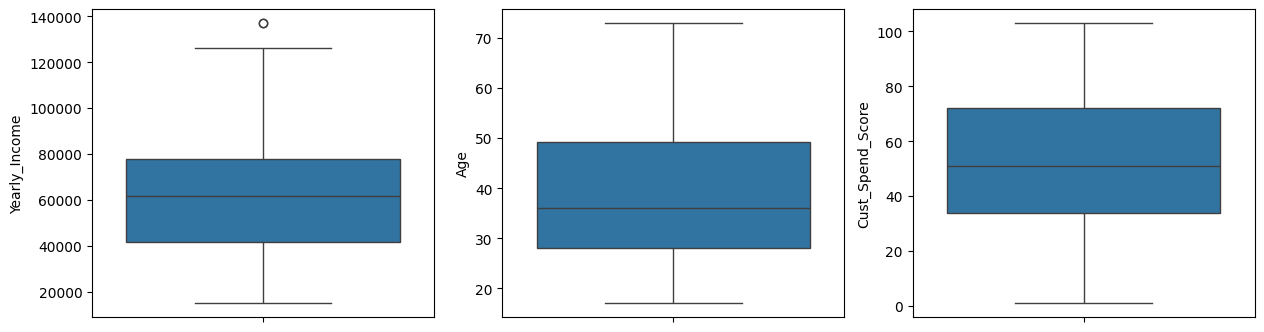

In [12]:
# consider the numeric variables
df_num = df_cust.drop(['Sex'], axis = 1)

# plot the boxplot for each numerical variable
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):

    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_cust[variable], ax = subplot)

# display the plot
plt.show()

We can see that an outlier is present in the variable `Yearly_Income`. Before clustering, we remove this outlier.

In [13]:
# consider the observations with yearly income less than 130000
df_cust = df_cust[df_cust['Yearly_Income'] < 130000]

<a id="null"></a>
## 2.5 Missing Value Treatment

**First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.**

In [14]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_cust.isnull().sum().sort_values(ascending=False)

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_cust.isnull().sum()*100/df_cust.isnull().count()).sort_values(ascending=False)

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys'
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
Yearly_Income,0,0.000000
Age,0,0.000000
Cust_Spend_Score,0,0.000000
Sex,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="scale"></a>
## 2.6 Scale the Data

#### We perform kmeans on the variables `Cust_Spend_Score` and `Yearly_Income`.

In [15]:
# consider the features 'Cust_Spend_Score' and 'Yearly_Income'
X_filtered = df_cust[['Cust_Spend_Score', 'Yearly_Income']]

# print top 5 observations of X
X_filtered.head()

,Cust_Spend_Score,Yearly_Income
0,44,15000
1,79,15000
2,8,16000
3,79,16000
4,41,17000


We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [16]:
# initialize the StandardScaler
X_norm = StandardScaler()

# normalize all the columns of the dataframe 'X_filtered'
num_norm = X_norm.fit_transform(X_filtered)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_norm, columns = X_filtered.columns)

X.head()

,Cust_Spend_Score,Yearly_Income
0,-0.283684,-1.779171
1,1.068399,-1.779171
2,-1.674398,-1.739447
3,1.068399,-1.739447
4,-0.399577,-1.699723


<a id="kmeans"></a>
# 3. K-Means Clustering

Let us perform the centroid-based clustering algorithm (i.e. K-Means). Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm.

Here we consider two techniques (elbow/scree plot and Silhouette score) to decide the optimal value of `K` to perform the K-means clustering.

<a id="elbow"></a>
## 3.1 Optimal Value of K Using Elbow Plot

Elbow plot is plotted with the value of K on the x-axis and the WCSS (Within Cluster Sum of Squares) on the y-axis. The value of K corresponding to the elbow point represents the optimal value for K.

In [17]:
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Let us plot the elbow plot and identify the elbow point.

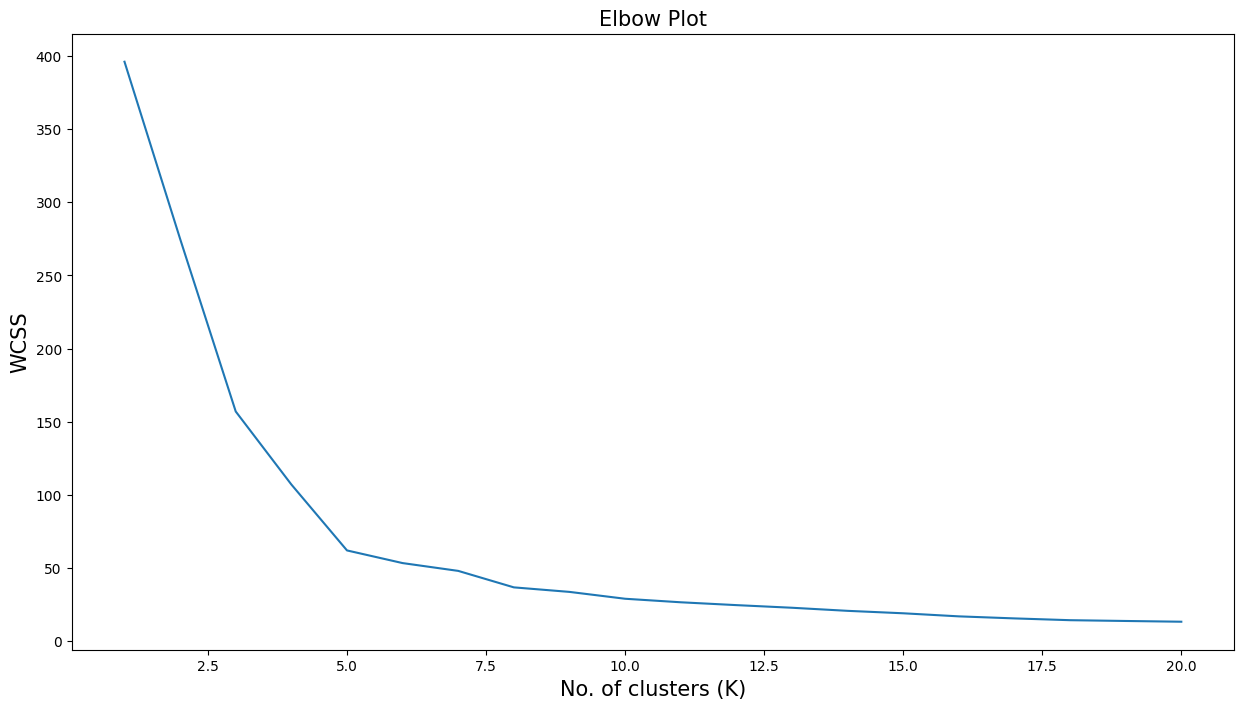

In [18]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

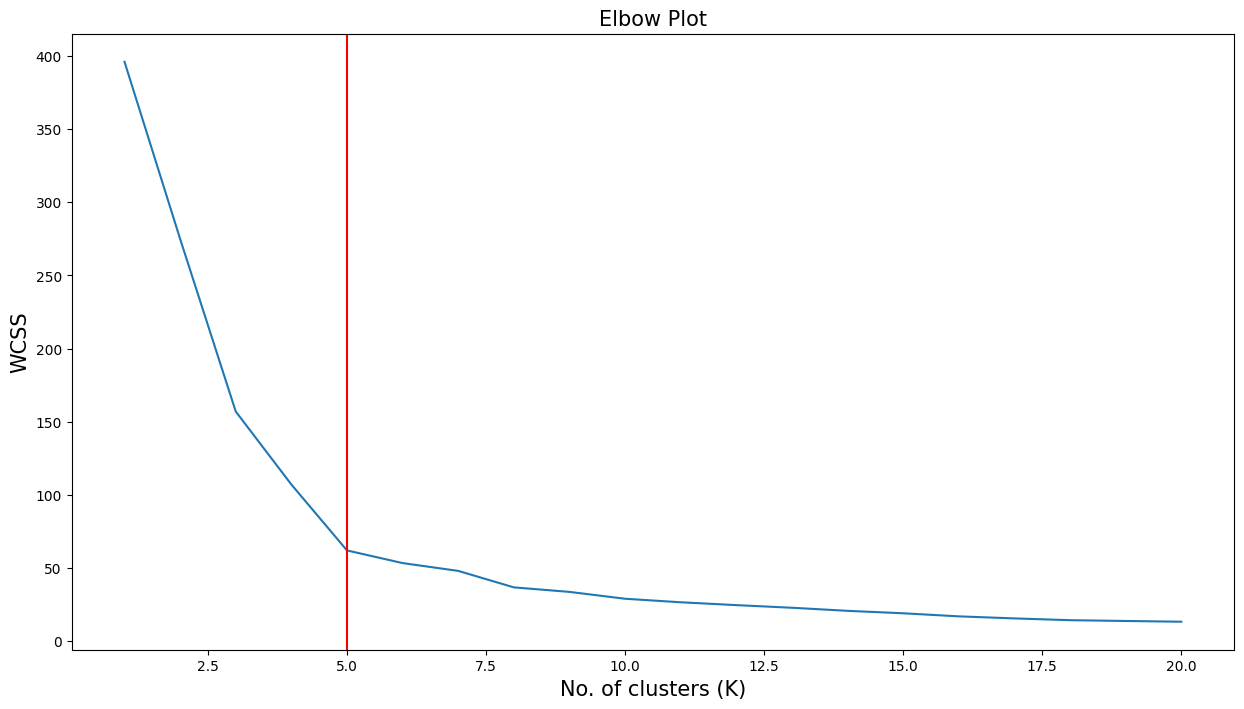

In [19]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 5, color = 'red')

# display the plot
plt.show()

**Interpretation:** We can see that the for K = 5, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 5, the WCSS is decreasing slowly.

Now, let us use the silhouette score method to identify the optimal value of K.

<a id="silhouette"></a>
## 3.2 Optimal Value of K Using Silhouette Score

The Silhouette score can also be used to identify the optimal number of clusters. We plot the Silhouette score for different values of K. The `K` with the highest Silhouette score represents the optimal value for the number of clusters (K).

In [20]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.38458088288577474)
For 3 clusters the silhouette score is 0.4617052050469738)
For 4 clusters the silhouette score is 0.4941073313280528)
For 5 clusters the silhouette score is 0.5582289588979077)
For 6 clusters the silhouette score is 0.538257145108287)


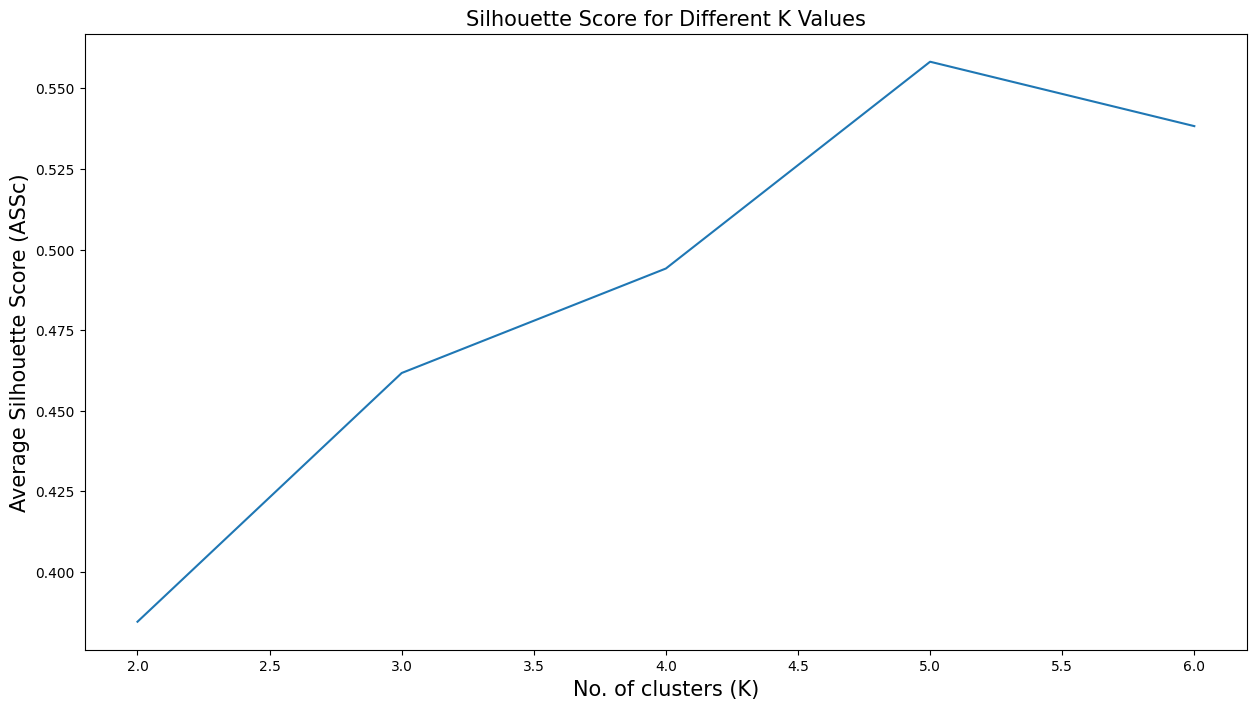

In [43]:
# visualize the silhouette scores to get the optimal value of K
# create a list to store silhouette scores for each K
silhouette_scores_list = []

# ensure n_clusters is defined (it's from previous cell, but good to be explicit for re-execution)
n_clusters = [2, 3, 4, 5, 6]

# X (scaled data) is available from kernel state

# use 'for' loop to build the clusters and collect scores
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    silhouette_scores_list.append(score)

plt.plot(n_clusters, silhouette_scores_list)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Different K Values', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('Average Silhouette Score (ASSc)', fontsize = 15)

# display the plot
plt.show()

#### Visualize the silhouette scores

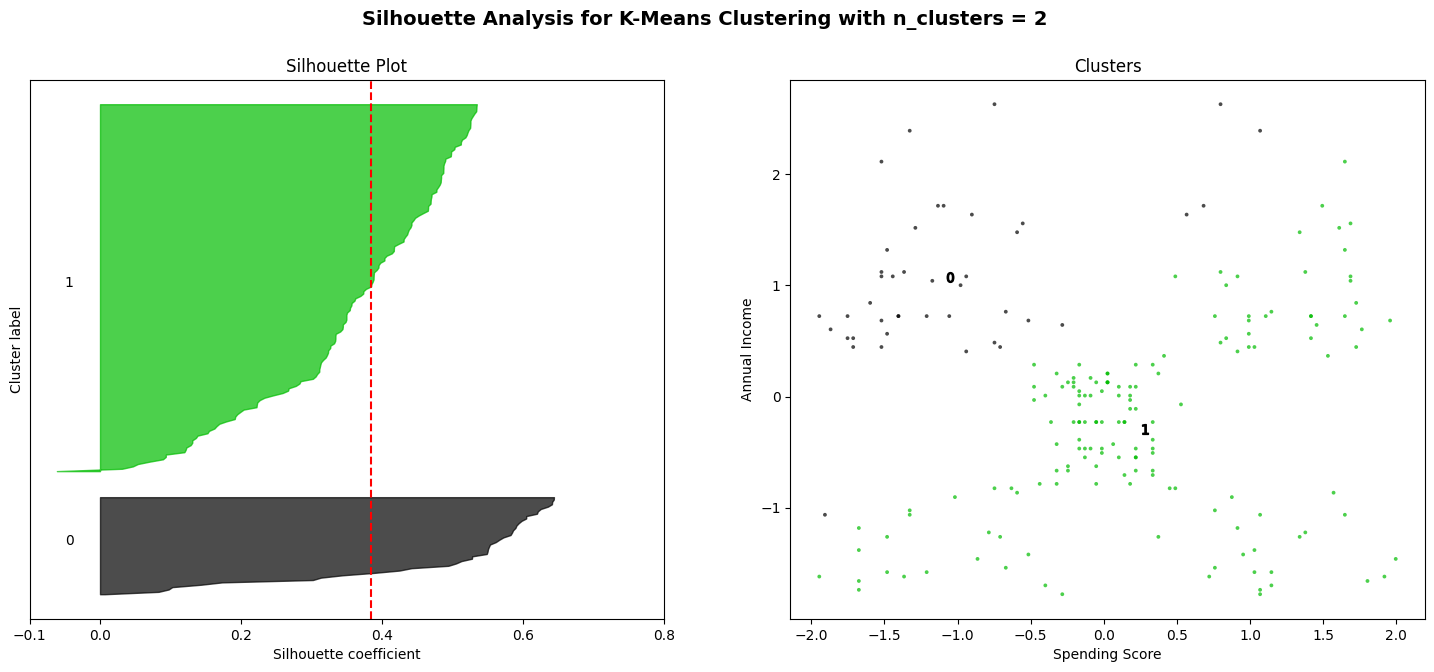

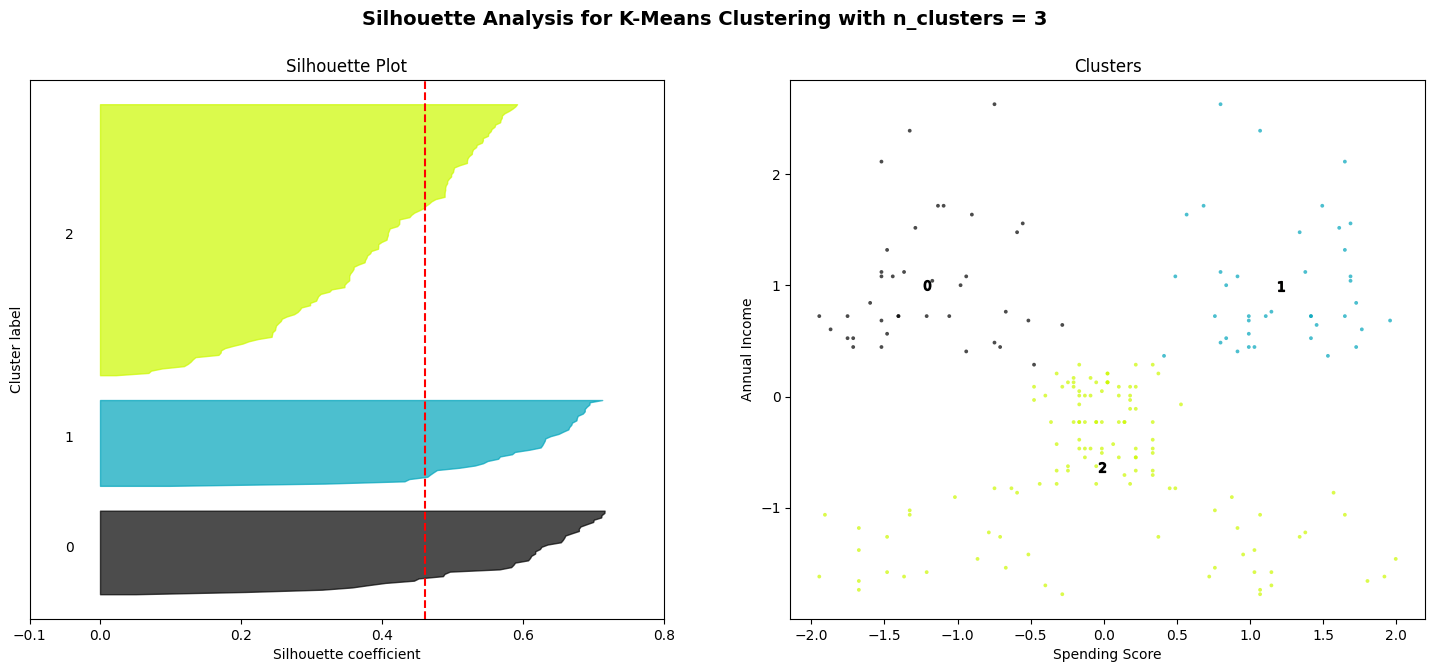

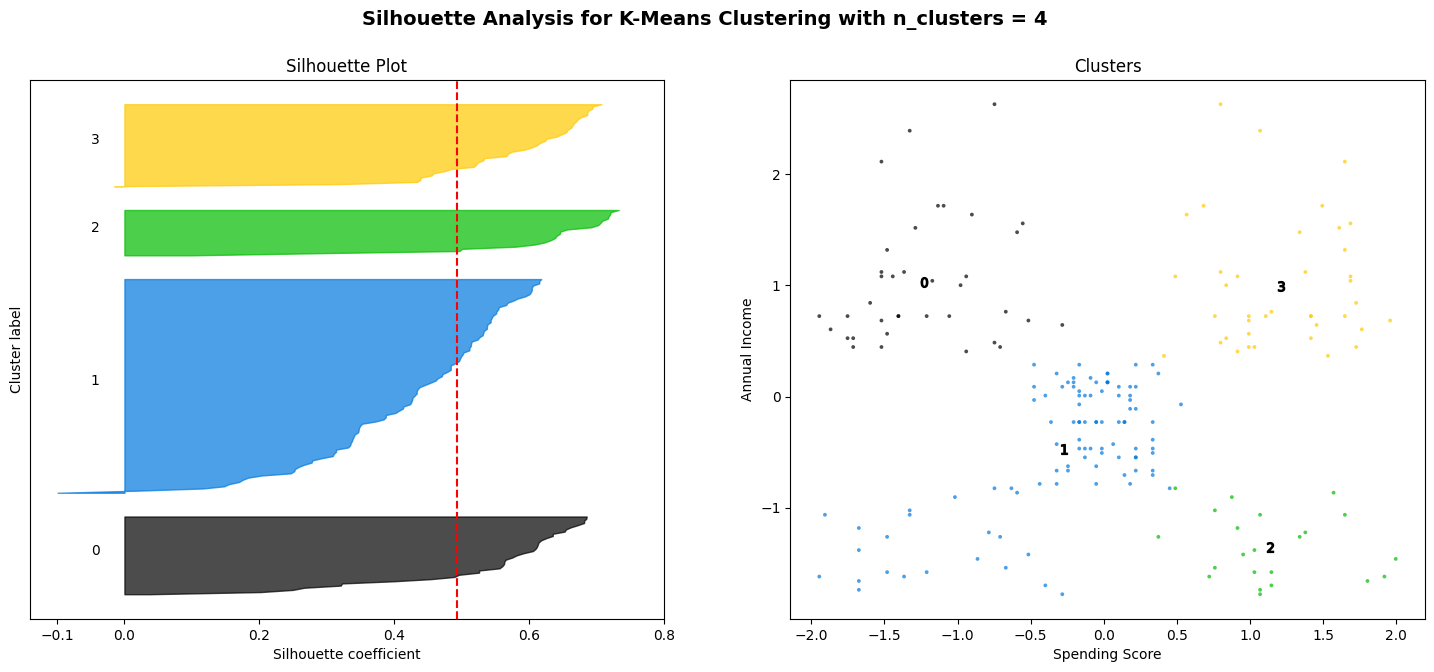

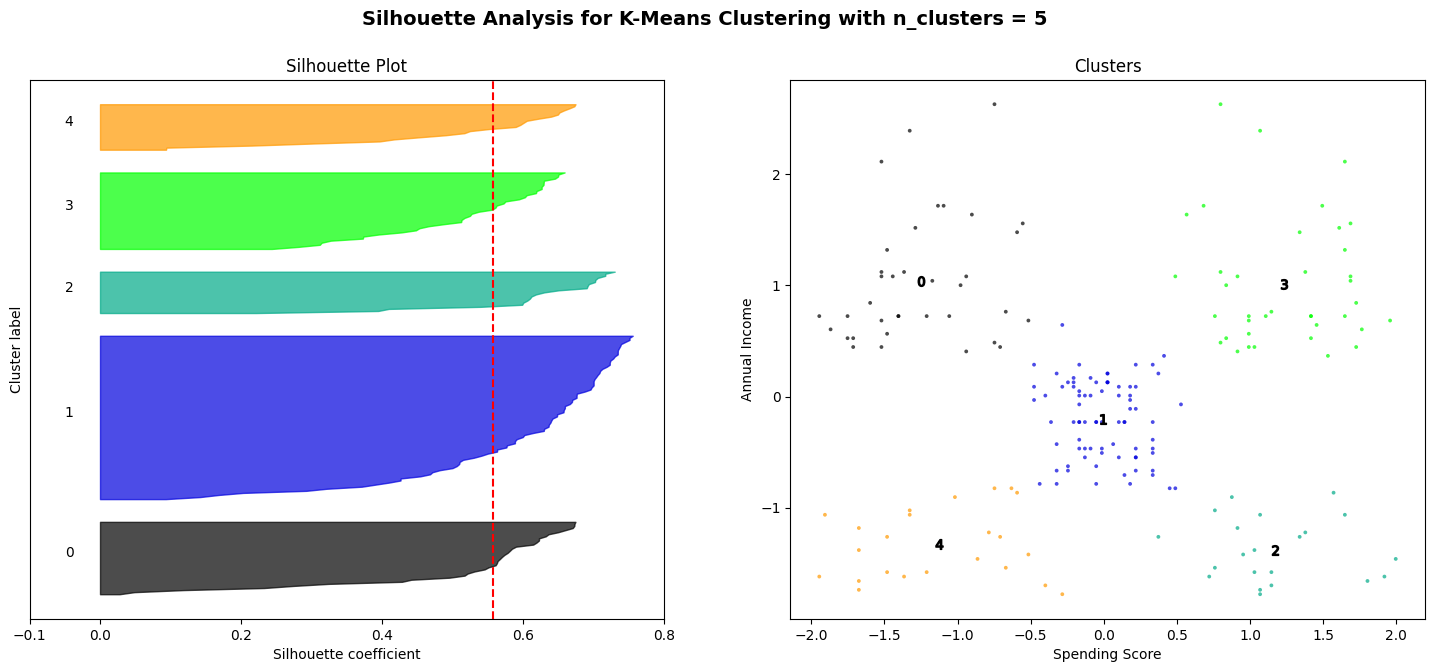

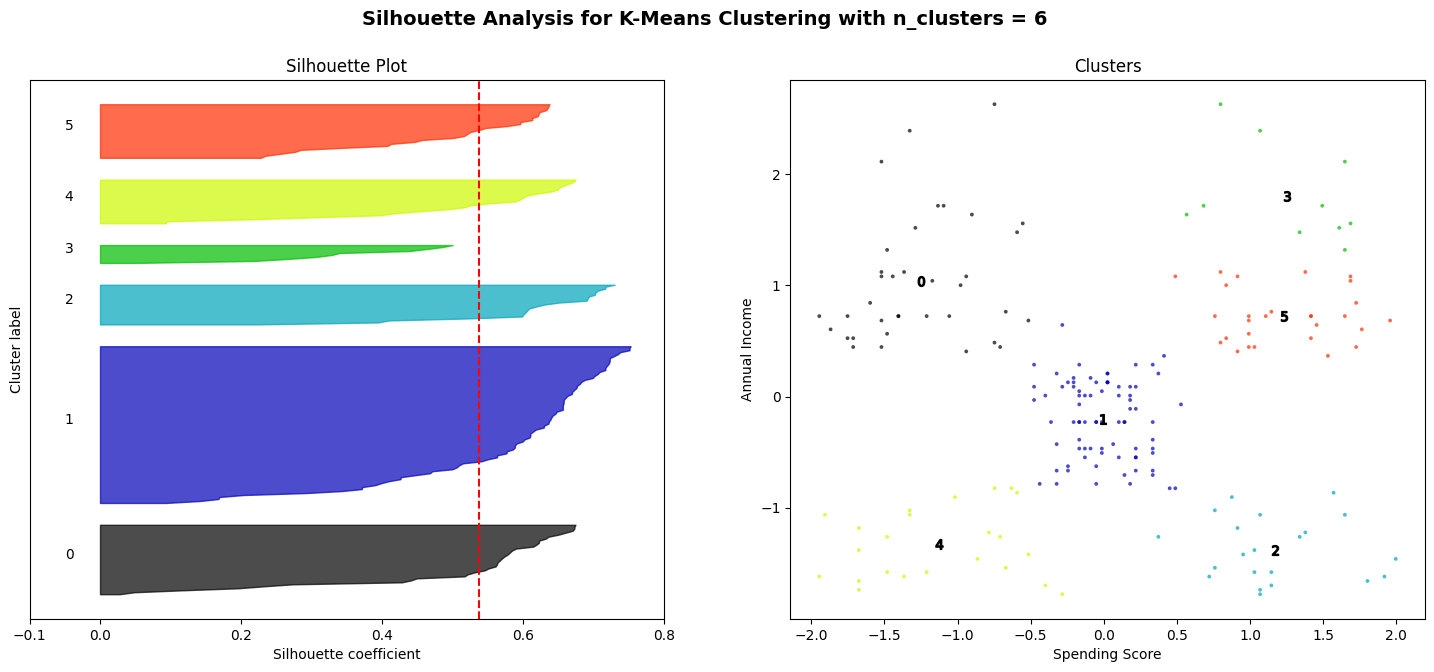

In [21]:
# consider the number of clusters
n_clusters = [2, 3, 4, 5, 6]

# consider an array of the data
X = np.array(X)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:

    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)

    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):

        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()

        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])

    # set the ticks for x-axis
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])


    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)

    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_

    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")

    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14,
                 fontweight='bold')

# display the plot
plt.show()

**Interpretation:** The above plot shows the silhouette plot and the clusters formed for each value of K. The plot shows that there are outliers (where the silhouette coefficient is less than 0) for K = 2,3,4. Also for K = 6, the 6th cluster has the silhouette score less than the average silhouette score. Thus we can not consider the K values as 2,3,4 and 6.

Also from the above output, we can see that the silhouette score is maximum for k = 5 and from the plot, we can see that there are no outliers for 5 clusters and all the clusters have silhouette coefficients greater than the average silhouette score. Thus we choose K = 5 as the optimal value of k.

<a id="model"></a>
## 3.3 Build the Clusters

Let us build the 5 clusters using K-menas clustering.

In [22]:
# build a K-Means model with 5 clusters
new_clusters = KMeans(n_clusters = 5, random_state = 10)

# fit the model
new_clusters.fit(X)

# append the cluster label for each point in the dataframe 'df_cust'
df_cust['Cluster'] = new_clusters.labels_

In [23]:
# head() to display top five rows
df_cust.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster
0,15000,18,44,0,4
1,15000,18,79,0,2
2,16000,23,8,1,4
3,16000,25,79,1,2
4,17000,32,41,1,4


#### Check the size of each cluster

In [24]:
df_cust.Cluster.value_counts()

,count
Cluster,
1,80
3,38
0,36
4,23
2,21


**Plot a barplot to visualize the cluster sizes**

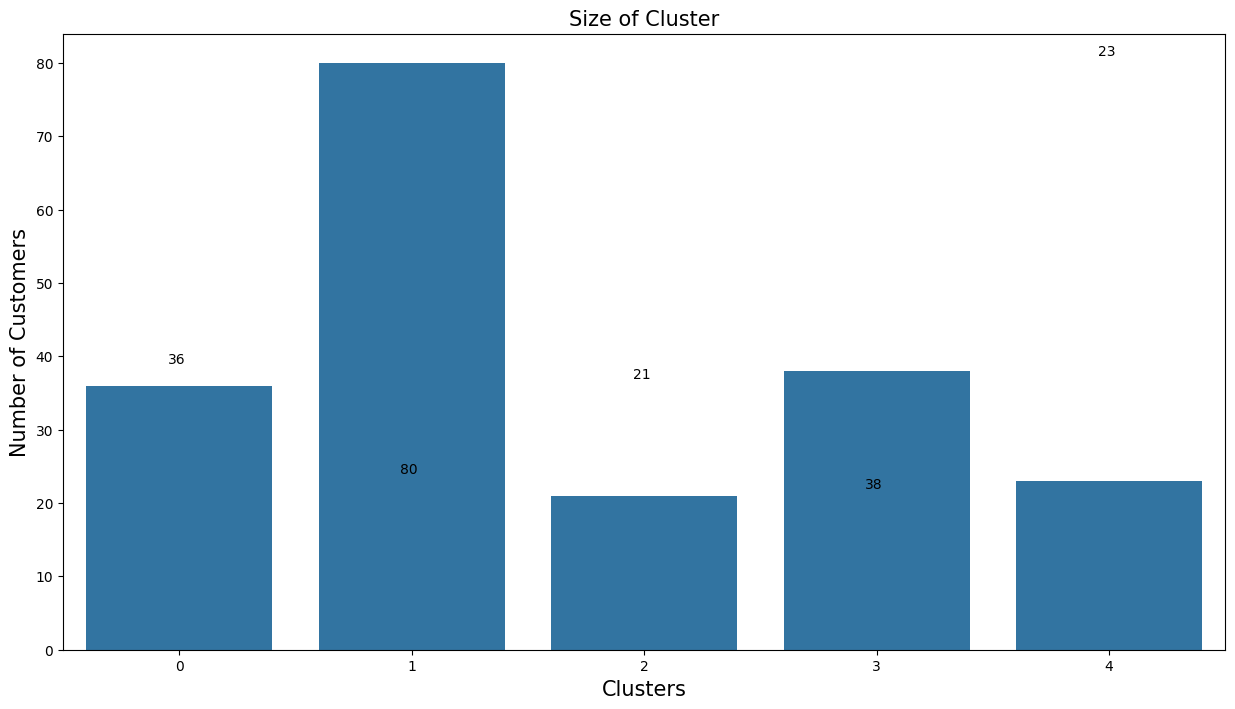

In [25]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df_cust, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =22, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =81, s = np.unique(new_clusters.labels_, return_counts=True)[1][4])

# display the plot
plt.show()

The 5th cluster is the largest cluster containing 80 observations.

<a id="inter"></a>
## 3.4 Analyze the Clusters

#### Let us visualize the clusters by considering the variables 'Cust_Spend_Score' and 'Yearly_Income'.

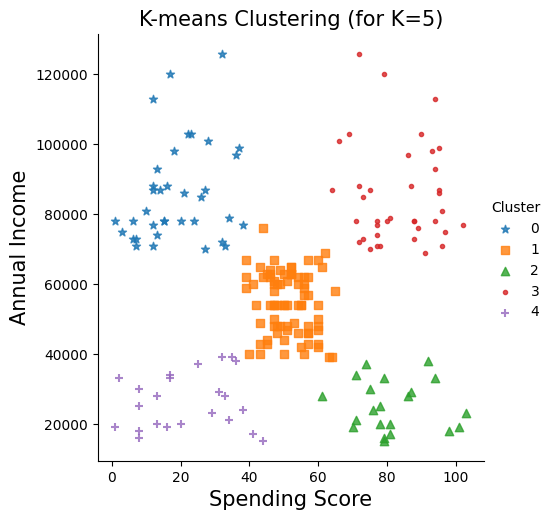

In [26]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot(x = 'Cust_Spend_Score', y = 'Yearly_Income', data = df_cust, hue = 'Cluster',
                markers = ['*', ',', '^', '.', '+'], fit_reg = False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=5)', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 15)
plt.ylabel('Annual Income', fontsize = 15)

# display the plot
plt.show()

Now let us understand the summary statistics for each cluster.

### Cluster 1

#### Check the size of the cluster

In [27]:
# size of a cluster 1
len(df_cust[df_cust['Cluster'] == 0])

36

#### Compute the statistical summary for the customers in this cluster

In [28]:
# statistical summary of the numerical variables
df_cust[df_cust.Cluster==0].describe()

,Yearly_Income,Age,Cust_Spend_Score,Cluster
count,36.000000,36.000000,36.000000,36.000000
mean,85916.666667,40.805556,18.916667,0.000000
std,14275.603565,10.764544,10.310536,0.000000
min,70000.000000,21.000000,1.000000,0.000000
25%,76500.000000,33.750000,12.000000,0.000000
50%,80000.000000,42.000000,16.500000,0.000000
75%,94000.000000,47.250000,27.000000,0.000000
max,126000.000000,59.000000,38.000000,0.000000


In [29]:
# summary of the categorical variable
df_cust[df_cust.Cluster==0].describe(include = object)

,Sex
count,36
unique,2
top,0
freq,19


**Interpretation:** The above summary shows that the average yearly income of the customers in this cluster is 85210.53 dollars. On average, their spending score is 83 and the average age is 32 years. Approximately 55% of the customers are male.

Here the spending score is high along with the high income.

### Cluster 2

#### Check the size of the cluster

In [30]:
# size of a cluster 2
len(df_cust[df_cust['Cluster'] == 1])

80

#### Compute the statistical summary for the customers in this cluster

In [31]:
# statistical summary of the numerical variables
df_cust[df_cust.Cluster==1].describe()

,Yearly_Income,Age,Cust_Spend_Score,Cluster
count,80.000000,80.000000,80.000000,80.000000
mean,54687.500000,43.387500,51.200000,1.000000
std,8839.774540,16.593802,6.404903,0.000000
min,39000.000000,17.000000,39.000000,1.000000
25%,47750.000000,28.750000,47.000000,1.000000
50%,54000.000000,45.000000,51.000000,1.000000
75%,62000.000000,56.250000,56.000000,1.000000
max,76000.000000,73.000000,65.000000,1.000000


In [32]:
# summary of the categorical variable
df_cust[df_cust.Cluster==1].describe(include = object)

,Sex
count,80
unique,2
top,1
freq,48


**Interpretation:** The above summary shows that the average yearly income of the customers in this cluster is 26304.35 dollars. On average, their spending score is 22 and the average age is 45 years. Approximately 61% of the customers are female.

Here the spending score is low along with the less income.

### Cluster 3

#### Check the size of the cluster

In [33]:
# size of a cluster 3
len(df_cust[df_cust['Cluster'] == 2])

21

#### Compute the statistical summary for the customers in this cluster

In [34]:
# statistical summary of the numerical variables
df_cust[df_cust.Cluster==2].describe()

,Yearly_Income,Age,Cust_Spend_Score,Cluster
count,21.000000,21.000000,21.000000,21.000000
mean,25095.238095,25.000000,81.619048,2.000000
std,7133.756107,5.513620,10.901726,0.000000
min,15000.000000,18.000000,61.000000,2.000000
25%,19000.000000,21.000000,75.000000,2.000000
50%,24000.000000,24.000000,79.000000,2.000000
75%,30000.000000,30.000000,87.000000,2.000000
max,38000.000000,34.000000,103.000000,2.000000


In [35]:
# summary of the categorical variable
df_cust[df_cust.Cluster==2].describe(include = object)

,Sex
count,21
unique,2
top,1
freq,12


**Interpretation:** The above summary shows that the average yearly income of the customers in this cluster is 85916.67 dollars. On average, their spending score is 19 and the average age is 41 years. Approximately 52% of the customers are male.

Here the spending score is low as compared to the high annual income. This group represent middle-aged customers, who tend to spend less and invest more.

### Cluster 4

#### Check the size of the cluster

In [36]:
# size of a cluster 4
len(df_cust[df_cust['Cluster'] == 3])

38

#### Compute the statistical summary for the customers in this cluster

In [37]:
# statistical summary of the numerical variables
df_cust[df_cust.Cluster==3].describe()

,Yearly_Income,Age,Cust_Spend_Score,Cluster
count,38.000000,38.000000,38.000000,38.000000
mean,85210.526316,32.710526,83.315789,3.000000
std,14235.771265,4.507698,10.285401,0.000000
min,69000.000000,26.000000,64.000000,3.000000
25%,75250.000000,29.000000,75.000000,3.000000
50%,78500.000000,33.000000,83.500000,3.000000
75%,91750.000000,36.000000,93.750000,3.000000
max,126000.000000,42.000000,102.000000,3.000000


In [38]:
# summary of the categorical variables
df_cust[df_cust.Cluster==3].describe(include = object)

,Sex
count,38
unique,2
top,1
freq,21


**Interpretation:** The above summary shows that the average yearly income of the customers in this cluster is 25095.24 dollars. On average, their spending score is 82 and the average age is 25 years. Approximately 57% of the customers are female.

Here the spending score is high, but the yearly income is low. This group represent young adults, who tend to spend more despite of the less salary.

### Cluster 5

#### Check the size of the cluster

In [39]:
# size of a cluster 5
len(df_cust[df_cust['Cluster'] == 4])

23

#### Compute the statistical summary for the customers in this cluster

In [40]:
# statistical summary of the numerical variables
df_cust[df_cust.Cluster==4].describe()

,Yearly_Income,Age,Cust_Spend_Score,Cluster
count,23.000000,23.000000,23.000000,23.000000
mean,26304.347826,45.695652,22.130435,4.000000
std,7893.811055,13.237120,13.222929,0.000000
min,15000.000000,18.000000,1.000000,4.000000
25%,19500.000000,36.500000,10.500000,4.000000
50%,25000.000000,45.000000,20.000000,4.000000
75%,33000.000000,52.500000,33.500000,4.000000
max,39000.000000,69.000000,44.000000,4.000000


In [41]:
# summary of the categorical variables
df_cust[df_cust.Cluster==4].describe(include = object)

,Sex
count,23
unique,2
top,1
freq,14


**Interpretation:** The above summary shows that the average yearly income of the customers in this cluster is 54687.5 dollars. On average, their spending score is 51 and the average age is 43 years. Here, 60% of the customers are female.

This group has a mediocre spending score along with the average income.